# Tweets Dataset

The sentiment dataset comprises 1,600,000 tweets obtained through the Twitter API, and has been annotated to indicate sentiment, with 0 representing negative and 4 representing positive. This dataset is valuable for sentiment analysis, as it provides a large and diverse collection of tweets that can be used to train and test sentiment detection algorithms. With its extensive range of user-generated content, the dataset offers insights into public opinion and emotional expression on various topics. 

This analysis aims to facilitate sentiment analysis through Twitter data. By examining the data, we will gain insights into the prevailing attitudes and emotions expressed within the platform. This process will enable us to identify trends, patterns, and sentiments, which can be valuable for various applications such as brand monitoring, market research, and public opinion analysis.


##### Content
1. Data Exploration
2. Data visualization

##### Features
- target: the polarity of the tweet (0 = negative and 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted.
- text: the text of the tweet.

## Questions to Be Answered with the Dataset
1. What is the distribution of sentiments (positive and negative) in the tweets?
2. Are there temporal trends in the polarity of tweets over time?
3. Which topics or keywords are associated with positive or negative sentiments in the tweets?
4. Are there specific users who tend to post more positive or negative tweets?
5. Can patterns or correlations be identified between the user who posts the tweet and its polarity?
6. How does the polarity of tweets compare based on the associated query (flag)?
7. What insights can be gained from analyzing the relationship between the date of the tweet and its polarity?

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the csv file 
df = pd.read_csv("tweets.csv")

## Data Exploration

In [3]:
# show first few records
df.head ()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# get the number of records and columns
df.shape

(1048575, 6)

In [5]:
# get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [6]:
# check missing values
df.isnull().sum()


Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

In [7]:
# check duplicate values
df.duplicated().sum()


0

In [8]:
df.describe()


,Target,ID
count,1.048575e+06,1.048575e+06
mean,9.482431e-01,1.976166e+09
std,1.701120e+00,2.300580e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990869e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


## Data Visualization

#### What is the distribution of sentiments (positive and negative) in the tweets?

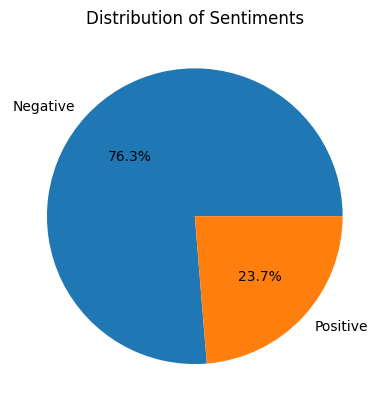

In [9]:
#Distribution of sentiments
labels = ['Negative' , 'Positive']
plt.pie(df['Target'].value_counts(), autopct = '%1.1f%%', labels= labels )
plt.title('Distribution of Sentiments')
plt.show()


##### Report
In the graph, we can observe the distribution of sentiments in the tweets. The blue color represents the negative sentiments, accounting for 76.3%, while the orange color represents the positive sentiments, comprising 23.7%.

This analysis provides valuable insights into the sentiments expressed in the tweets. The majority of the sentiments are negative, indicating a prevailing trend of unfavorable opinions or emotions. Understanding the distribution of sentiments in this manner can offer significant implications for various purposes, such as brand reputation management, public opinion analysis, or market research.

By identifying and quantifying the prevalence of negative and positive sentiments, businesses and organizations can gain a deeper understanding of public perception and tailor their strategies accordingly. This data-driven approach can be instrumental in making informed decisions and addressing any underlying issues that may be contributing to the negative sentiments expressed in the tweets.

It is crucial to note that while sentiment analysis provides a snapshot of public opinion at a specific time, it may not capture the full complexity of human emotions. Context, sarcasm, and cultural nuances can impact the accuracy of sentiment analysis. Therefore, it is essential to complement quantitative data with qualitative insights to gain a comprehensive understanding of public sentiments.

Furthermore, this analysis underscores the importance of sentiment analysis in the realm of data analytics. By leveraging tools and techniques to extract and interpret sentiment from textual data, businesses can harness valuable insights that can drive meaningful actions and improvements.

In conclusion, the distribution of sentiments in the analyzed tweets reveals a significant predominance of negative expressions. This finding underscores the need for proactive measures to address any underlying issues and enhance overall sentiment. By incorporating sentiment analysis into data analytics practices, businesses can gain a competitive edge and effectively respond to public opinion.

As for recommendations, it is important to consider the context in which the tweets were posted. Are there specific events or topics that are driving the sentiments? It may also be beneficial to further analyze the content of the tweets to identify specific themes or issues that are contributing to the sentiments expressed. Additionally, it would be valuable to monitor any changes in sentiment over time to understand evolving public opinion.


#### Who has written the most tweets?


In [18]:
# users with most tweets
most_tweets = df['User'].value_counts().nlargest(10).reset_index()
most_tweets

,User,count
0,lost_dog,549
1,tweetpet,310
2,webwoke,264
3,mcraddictal,238
4,wowlew,210
5,SallytheShizzle,201
6,nuttychris,199
7,tsarnick,184
8,Djalfy,164
9,StDAY,156


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'lost_dog'),
  Text(1, 0, 'tweetpet'),
  Text(2, 0, 'webwoke'),
  Text(3, 0, 'mcraddictal'),
  Text(4, 0, 'wowlew'),
  Text(5, 0, 'SallytheShizzle'),
  Text(6, 0, 'nuttychris'),
  Text(7, 0, 'tsarnick'),
  Text(8, 0, 'Djalfy'),
  Text(9, 0, 'StDAY')])

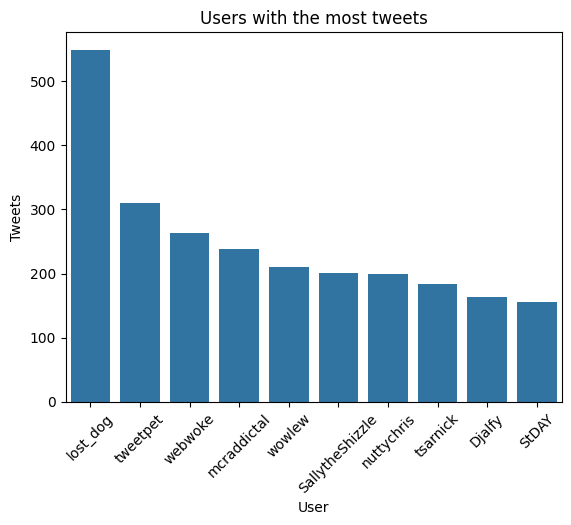

In [19]:
most_tweets_colums = ['User', 'count']
sns.barplot (x = 'User', y = 'count', data = most_tweets)
plt.title ('Users with the most tweets')
plt.xlabel ('User')
plt.ylabel ('Tweets')
plt.xticks(rotation=45)

##### Report

In the graph, we can observe the top 10 users who have authored the most tweets and the corresponding quantity of tweets generated. This data is crucial for our data analysis, as it provides insights into the most active users within the dataset.

Analyzing the tweet activity of these top users can offer valuable information regarding user engagement, content preferences, and potential influencers within the network. By understanding the behavior of these prolific tweeters, we can gain a deeper understanding of the dynamics at play within the dataset.

Furthermore, examining the types of content shared by these users, as well as the level of interaction their tweets receive, can provide additional layers of insight. This information can be leveraged to refine content strategies, identify key trends, and potentially even forecast future user behavior.

As we delve into this analysis, it's important to consider the implications of these findings and how they may impact our overall objectives. Are there specific patterns or themes that emerge from the tweets of these top users? How do these patterns align with our goals and target audience? These are critical questions that must be addressed as we move forward with our data-driven insights.

In conclusion, the visualization of the top 10 users and their tweet volumes serves as a valuable starting point for our analysis. However, it's essential to delve deeper into the behaviors and characteristics of these users to extract meaningful and actionable insights. By doing so, we can refine our strategies, optimize our content, and ultimately enhance our overall impact within the digital landscape.

Moving forward, it's recommended to conduct a more granular analysis of the tweet content, user interactions, and broader trends within the dataset. Additionally, exploring potential collaborations or engagement strategies with these top users could yield fruitful results. By continuing to leverage data-driven insights, we can refine our approach and drive meaningful outcomes within our digital endeavors.